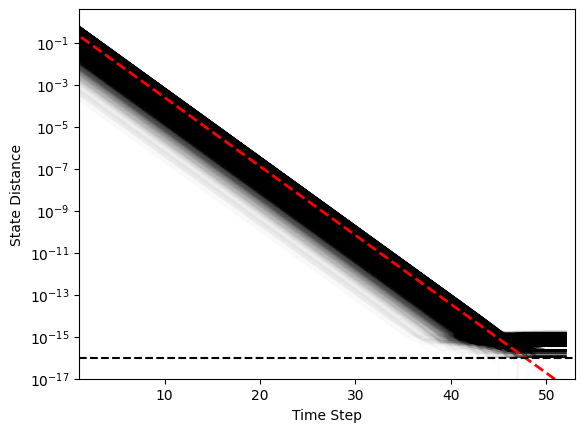

In [1]:
# Tristan Ursell
# April 2024
#
# For a given transition matrix P, with or without a stationary distribution, this code calculates the state distance between some 
# initial state and the stationary state as a function iteration, clearly showing the exponential decay into the stationary state. Transition
# matrices with stationary distributions produce the same decay constant for all initial conditions, while transition matrices with absorbing
# state / sub-regions produce distinct decay constants and landing probabiliites depending on the initial state conditions.
#
# Currently, the code is 'tuned' to run the 2x2 matrix discussed in the tutorial.  Other matrices are encoded below, but plot bounds, max
# iterations, and decay lines must be adjusted to fit different transition matrices.
#

import numpy as np
import matplotlib.pyplot as plt

# Number of iterations per trial
N = 53

# Number of trials (i.e., number of random initial states to simulate)
T = 10000

# Example transition matrix (adjustable 2x2 matrix used in the tutorial)
a = 0.33
b = 0.2
P = np.array([
    [1-a, a],
    [b, 1-b]
])

'''
# Other possible transition matrices
# 3x3 matrix #1
P1 = np.array([
    [0.3, 0.45, 0.25],
    [0.35, 0.45, 0.2],
    [0.6, 0.1, 0.3]
])

# 3x3 matrix #2
P2 = np.array([
    [0.1, 0.35, 0.55],
    [0.9, 0.05, 0.05],
    [0.65, 0.25, 0.1]
])

# 3x3 matrix #3 with 2 absorbing states
P3 = np.array([
    [1, 0, 0],
    [0.35, 0.45, 0.2],
    [0, 0, 1]
])

# Adjustable 3x3 matrix with probability parameter
p = 0.25
P4 = np.array([
    [p, 1-p, 0],
    [0, p, 1-p],
    [1-p, 0, p]
])

# 4x4 matrix with 2 absorbing states
P5 = np.array([
    [1, 0, 0, 0],
    [0.05, 0.4, 0.5, 0.05],
    [0, 0.2, 0.7, 0.1],
    [0, 0, 0, 1]
])
'''


# Create T random initial condition vectors
temp = np.random.rand(P.shape[0], T)
temp_sum = np.sum(temp, axis=0)
state0 = temp / temp_sum

# Calculate stationary eigenvector
eigvals, eigvecs = np.linalg.eig(P.T)
eig1 = np.argmin(np.abs(eigvals - 1))  # Find eigenvalue closest to 1
v0 = np.abs(eigvecs[:, eig1]) / np.sum(np.abs(eigvecs[:, eig1]))  # Normalize

# Matrix to track entropy/distance over trials and iterations
H = np.zeros((T, N))
M = np.zeros((T, N))

# Stationary entropy (if v0 is the stationary state)
Heq = -np.sum(v0 * np.log(v0))

# Iterate for all trials
sub = np.outer(v0, np.ones(T))
for i in range(N):
    # Calculate entropy
    H[:, i] = -np.sum(state0 * np.log(state0), axis=0)

    # Calculate state distance
    M[:, i] = np.sum(np.abs(state0 - sub), axis=0)

    # Evolve state
    state0 = P.T @ state0

# Plot results
plt.figure()
plt.semilogy(M.T, '-', linewidth=2, color=(0, 0, 0, 0.01))
plt.semilogy(np.exp(np.log(np.linalg.det(P)) * np.arange(1, N+1)), 'r--', linewidth=2)
plt.axhline(y=1e-16, color='k', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('State Distance')
plt.box(True)
plt.xlim([1, N])
plt.ylim([1e-17, 4])
plt.savefig(f'state_distance_decay.svg', format='svg')
plt.show()

